In [33]:
from __future__ import print_function, division
from nilmtk import DataSet, HDFDataStore, TimeFrame
from os.path import join
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from nilmtk.metrics import f1_score # metrics is actually different; need to look at this
from nilmtk.metrics import rms_error_power
from nilmtk.metrics import mean_normalized_error_power
from nilmtk.disaggregate import fhmm_exact # OK, only different in what is printed to screen (and this is diagonal covariance matrix)


In [34]:
building_number = 1
ds = DataSet('/nilmtk/data/iawe.h5') #('/nilmtk/data/ukdale.h5') #("/data/REDD/redd.h5")


In [35]:
train = DataSet('/nilmtk/data/iawe.h5') #('/nilmtk/data/ukdale.h5') #("/data/REDD/redd.h5")
test = DataSet('/nilmtk/data/iawe.h5') #('/nilmtk/data/ukdale.h5') #("/data/REDD/redd.h5")

In [36]:
elec = train.buildings[building_number].elec

In [37]:
mains = elec.mains()
df_all = mains.power_series_all_data() #df_all has a bunch of NaNs
df_all_noNan = df_all.dropna()
a = df_all_noNan.keys()
middleTime = a[int(math.floor(a.size/3))]
middleTimeStr = "%d-%02d-%02d %02d:%02d:%02d" % (middleTime.year, middleTime.month, middleTime.day, middleTime.hour, middleTime.minute, middleTime.second)

Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.


In [38]:
middleTimeStr

'2013-06-19 01:48:19'

In [39]:
train.set_window(end=middleTimeStr)
test.set_window(start=middleTimeStr)

train_elec = train.buildings[building_number].elec
test_elec = test.buildings[building_number].elec

top_train_elec = train_elec.submeters().select_top_k(k=5)

10/10 ElecMeter(instance=12, building=1, dataset='iAWE', appliances=[Appliance(type='motor', instance=1)])

In [41]:
fhmm = fhmm_exact.FHMM() #mk change this later  to default
fhmm.train(top_train_elec, sample_period=60, resample=True)
output = HDFDataStore("/nilmtk/data/iawe_449_2.h5", 'w')
fhmm.disaggregate(test_elec.mains(), output, sample_period=60, resample=True)
output.close()

Training model for submeter 'ElecMeter(instance=7, building=1, dataset='iAWE', appliances=[Appliance(type='computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='iAWE', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=10, building=1, dataset='iAWE', appliances=[Appliance(type='television', instance=1)])'
Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=1, dataset='iA

In [42]:
%matplotlib inline

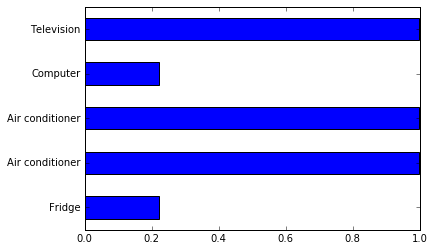

In [43]:
disag = DataSet("/nilmtk/data/iawe_449.h5") #load FHMM prediction
disag_elec = disag.buildings[building_number].elec
#disag_elec.plot() # plot all disaggregated data
f1 = f1_score(disag_elec, test_elec)
f1.index = disag_elec.get_labels(f1.index)
f1.plot(kind='barh')

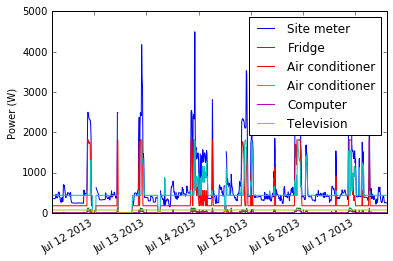

In [75]:
disag.store.window = TimeFrame(start='2013-07-10 18:00:00-05:00', end='2013-07-17 04:00:00-05:00')
disag.buildings[building_number].elec.plot() # plot all disaggregated data


In [76]:
rms = rms_error_power(disag_elec, elec)

ZeroDivisionError: float division by zero

In [15]:
rms

NameError: name 'rms' is not defined

In [77]:
mne = mean_normalized_error_power(disag_elec, elec)

ZeroDivisionError: float division by zero

In [15]:
mne

5      0.076923
6           inf
8      0.654321
9     80.000000
11    12.500000
dtype: float64